In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [2]:
url = 'https://raw.githubusercontent.com/JoelQFernandez/DSC-478---Programming-Machine-Learning-Applications---Final-Project/main/Data/spotify-pre_processed.csv'
spotify = pd.read_csv(url)
spotify

,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year,explicit_0,explicit_1,mode_0,mode_1
0,0.991000,['Mamie Smith'],0.598,0.030637,0.224,0cS0A1fUEUd1EW3FcF8AEI,0.000522,0.454545,0.3790,0.741868,Keep A Song In Your Soul,0.12,0.0936,0.615900,0.6340,1920s,1,0,1,0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.027237,0.517,0hbkKFIJm7Z05H8Zl9w30f,0.026400,0.454545,0.0809,0.825918,I Put A Spell On You,0.07,0.0534,0.356823,0.9500,1920s,1,0,1,0
2,0.993000,['Mamie Smith'],0.647,0.029792,0.186,11m7laMUgmOKqI3oYzuhne,0.000018,0.000000,0.5190,0.750168,Golfing Papa,0.04,0.1740,0.400810,0.6890,1920s,1,0,0,1
3,0.000173,['Oscar Velazquez'],0.730,0.078215,0.798,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,0.181818,0.1280,0.825135,True House Music - Xavier Santos & Carlos Gomi...,0.17,0.0425,0.525640,0.0422,1920s,1,0,0,1
4,0.295000,['Mixe'],0.704,0.030054,0.707,2hJjbsLCytGsnAHfdsLejp,0.000246,0.909091,0.4020,0.845102,Xuniverxe,0.02,0.0768,0.501324,0.2990,1920s,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,0.026752,0.866,46LhBf6TvYjZU2SMvGZAbn,0.000060,0.545455,0.1780,0.859933,The One,0.00,0.0356,0.517324,0.1860,2020s,1,0,1,0
174385,0.795000,['Alessia Cara'],0.429,0.026209,0.211,7tue2Wemjd0FZzRtDrQFZd,0.000000,0.363636,0.1960,0.756949,A Little More,0.00,0.0360,0.388942,0.2280,2020s,1,0,0,1
174386,0.806000,['Roger Fly'],0.671,0.039977,0.589,48Qj61hOdYmUCFJbpQ29Ob,0.920000,0.363636,0.1130,0.745549,Together,0.00,0.0282,0.443757,0.7140,2020s,1,0,1,0
174387,0.920000,['Taylor Swift'],0.462,0.044824,0.240,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0.000000,0.1130,0.750497,champagne problems,0.69,0.0377,0.703549,0.3200,2020s,0,1,0,1


In [3]:
spotify.describe().columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'popularity',
       'speechiness', 'tempo', 'valence', 'explicit_0', 'explicit_1', 'mode_0',
       'mode_1'],
      dtype='object')

In [4]:
# dataframe to be used for DBSCAN made up of the features without PCA dimensionality reduction
df = spotify[spotify.describe().columns]
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,explicit_0,explicit_1,mode_0,mode_1
0,0.991000,0.598,0.030637,0.224,0.000522,0.454545,0.3790,0.741868,0.12,0.0936,0.615900,0.6340,1,0,1,0
1,0.643000,0.852,0.027237,0.517,0.026400,0.454545,0.0809,0.825918,0.07,0.0534,0.356823,0.9500,1,0,1,0
2,0.993000,0.647,0.029792,0.186,0.000018,0.000000,0.5190,0.750168,0.04,0.1740,0.400810,0.6890,1,0,0,1
3,0.000173,0.730,0.078215,0.798,0.801000,0.181818,0.1280,0.825135,0.17,0.0425,0.525640,0.0422,1,0,0,1
4,0.295000,0.704,0.030054,0.707,0.000246,0.909091,0.4020,0.845102,0.02,0.0768,0.501324,0.2990,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,0.792,0.026752,0.866,0.000060,0.545455,0.1780,0.859933,0.00,0.0356,0.517324,0.1860,1,0,1,0
174385,0.795000,0.429,0.026209,0.211,0.000000,0.363636,0.1960,0.756949,0.00,0.0360,0.388942,0.2280,1,0,0,1
174386,0.806000,0.671,0.039977,0.589,0.920000,0.363636,0.1130,0.745549,0.00,0.0282,0.443757,0.7140,1,0,1,0
174387,0.920000,0.462,0.044824,0.240,0.000000,0.000000,0.1130,0.750497,0.69,0.0377,0.703549,0.3200,0,1,0,1


In [5]:
# random sample the data
sample = df.sample(frac=0.1, random_state=3)
sample

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,explicit_0,explicit_1,mode_0,mode_1
16762,0.8360,0.569,0.025402,0.2890,0.000010,0.000000,0.2820,0.749636,0.19,0.0317,0.316233,0.369,1,0,0,1
105509,0.2840,0.809,0.037504,0.4040,0.000000,0.363636,0.1110,0.784152,0.51,0.0556,0.513488,0.636,1,0,0,1
88526,0.1730,0.559,0.028379,0.4440,0.000002,0.363636,0.2440,0.829269,0.44,0.0537,0.402793,0.684,1,0,0,1
96876,0.9550,0.585,0.009254,0.2380,0.903000,0.909091,0.1590,0.698771,0.00,0.0489,0.391052,0.770,1,0,0,1
48648,0.3740,0.530,0.039287,0.6910,0.111000,0.181818,0.2900,0.854921,0.41,0.0307,0.480668,0.581,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11539,0.0671,0.641,0.038539,0.7800,0.001810,0.818182,0.0562,0.835095,0.56,0.0351,0.386962,0.746,1,0,0,1
113371,0.9910,0.342,0.033119,0.0798,0.917000,0.454545,0.1230,0.538752,0.00,0.0654,0.572899,0.416,1,0,0,1
66274,0.9190,0.200,0.037474,0.2280,0.000002,0.272727,0.2430,0.758187,0.32,0.0299,0.674872,0.203,1,0,0,1
81698,0.9050,0.454,0.025622,0.2750,0.820000,0.000000,0.1280,0.643145,0.21,0.0415,0.528983,0.558,1,0,0,1


In [6]:
neigh = NearestNeighbors(n_neighbors=20)
nbrs = neigh.fit(sample)
distances, indices = nbrs.kneighbors(sample)

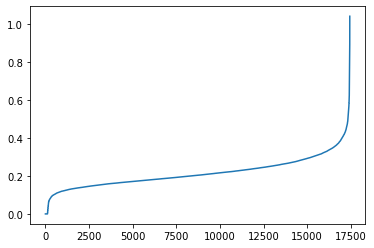

In [7]:
# Estimating the best epsilon value
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [8]:
# Compute DBSCAN with eps = .4
db = DBSCAN(eps=.4, min_samples=20).fit(sample)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [9]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
sil = metrics.silhouette_score(sample, labels)
percent_outliers = (n_noise_/(len(sample)))*100

In [10]:
#Print Values
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print ("Percent estimated outliers: %0.1f" % percent_outliers)
print("Silhouette Coefficient: %0.3f" % sil)

Estimated number of clusters: 7
Estimated number of noise points: 1518
Percent estimated outliers: 8.7
Silhouette Coefficient: 0.264


### Applying DBSCAN on entire Spotify dataset to generate cluster labels.

In [11]:
# Compute DBSCAN with eps = .4
clusters = DBSCAN(eps=.4, min_samples=20).fit(df)
clusters = pd.DataFrame(clusters.labels_, columns =['cluster']) 

In [12]:
spotify['cluster'] = clusters.cluster
spotify

,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,popularity,speechiness,tempo,valence,year,explicit_0,explicit_1,mode_0,mode_1,cluster
0,0.991000,['Mamie Smith'],0.598,0.030637,0.224,0cS0A1fUEUd1EW3FcF8AEI,0.000522,0.454545,0.3790,0.741868,...,0.12,0.0936,0.615900,0.6340,1920s,1,0,1,0,0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.027237,0.517,0hbkKFIJm7Z05H8Zl9w30f,0.026400,0.454545,0.0809,0.825918,...,0.07,0.0534,0.356823,0.9500,1920s,1,0,1,0,0
2,0.993000,['Mamie Smith'],0.647,0.029792,0.186,11m7laMUgmOKqI3oYzuhne,0.000018,0.000000,0.5190,0.750168,...,0.04,0.1740,0.400810,0.6890,1920s,1,0,0,1,1
3,0.000173,['Oscar Velazquez'],0.730,0.078215,0.798,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,0.181818,0.1280,0.825135,...,0.17,0.0425,0.525640,0.0422,1920s,1,0,0,1,1
4,0.295000,['Mixe'],0.704,0.030054,0.707,2hJjbsLCytGsnAHfdsLejp,0.000246,0.909091,0.4020,0.845102,...,0.02,0.0768,0.501324,0.2990,1920s,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,0.026752,0.866,46LhBf6TvYjZU2SMvGZAbn,0.000060,0.545455,0.1780,0.859933,...,0.00,0.0356,0.517324,0.1860,2020s,1,0,1,0,0
174385,0.795000,['Alessia Cara'],0.429,0.026209,0.211,7tue2Wemjd0FZzRtDrQFZd,0.000000,0.363636,0.1960,0.756949,...,0.00,0.0360,0.388942,0.2280,2020s,1,0,0,1,1
174386,0.806000,['Roger Fly'],0.671,0.039977,0.589,48Qj61hOdYmUCFJbpQ29Ob,0.920000,0.363636,0.1130,0.745549,...,0.00,0.0282,0.443757,0.7140,2020s,1,0,1,0,0
174387,0.920000,['Taylor Swift'],0.462,0.044824,0.240,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0.000000,0.1130,0.750497,...,0.69,0.0377,0.703549,0.3200,2020s,0,1,0,1,2


### Saving DBSCAN cluster labels to file.

In [13]:
# Assign %pwd to working_dir
working_dir = %pwd

In [14]:
spotify.to_csv((working_dir)+"/Data/spotify-classlabels-DBSCAN-without_pca.csv", index = False)